# Project -8 Credit Card Fraud Detection

# Contents.

1- Problem Statment

2- About

3- Load import Libraries.

4- Tasks To Be Performed:

    4.1. Load the dataset using the pandas module.
    
    4.2 Perform missing value analysis on the dataset.
    
    4.3 From the dataset, calculate the number of genuine transactions, number of fraud transactions
    and the percentage of fraud transactions.
    
    4.4 Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.
    
    4.5 Using the Standard Scaler module, normalize the amount column andstore the new values in the 
    NormalizedAmount column.
    
    4.6 Split the dataset in train and test set and have a 70:30 split ratio for the model.
    
    4.7 Now use a decision tree and random forest model for training on top of the train set.
    
    4.8 Compare the predictions of both models using predict().
    
    4.9 Compare the accuracy of both models using score().
    
    4.10 Check the performance matrix of both models and compare which model is having the highest performanc
    
5- Conclussion

# 1. Problem Statment

1. A credit card is a small thin plastic or fiber card that incorporates information about the person such as a 
picture or signature and the person’s name on it to charge purchases and services to his linked account. Charges
are debited regularly. Nowadays, card data is read by ATMs, swiping machines, store readers, banks and online transactions.


2. Each card has a unique card number which is very important. Its security mainly relies on the physical security of
the card and also the privacy of the credit card number. There is a rapid growth in credit card transactions which has
led to substantial growth in scam cases.



3. Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. Multiple data mining
and statistical techniques are used to catch fraud. Therefore the detection of fraud using efficient and secured methods 
are very important.

# 2. About

Credit card fraud is an inclusive term for fraud committed using a payment card, such as a credit card or debit card.
The purpose may be to obtain goods or services or to make payment to another account, which is controlled by a criminal.
The Payment Card Industry Data Security Standard (PCI DSS) is the data security standard created to help financial 
institutions process card payments securely and reduce card fraud.

Credit card fraud can be authorised, where the genuine customer themselves processes payment to another account which
is controlled by a criminal, or unauthorised, where the account holder does not provide authorisation for the payment
to proceed and the transaction is carried out by a third party. In 2018, unauthorised financial fraud losses across
payment cards and remote banking totalled £844.8 million in the United Kingdom. Whereas banks and card companies
prevented £1.66 billion in unauthorised fraud in 2018. That is the equivalent to £2 in every £3 of attempted fraud
being stopped.

Credit card fraud can occur when unauthorized users gain access to an individual's credit card information in order
to make purchases, other transactions, or open new accounts. A few examples of credit card fraud include account
takeover fraud, new account fraud, cloned cards, and cards-not-present schemes. This unauthorized access occurs
through phishing, skimming, and information sharing by a user, oftentimes unknowingly. However, this type of fraud
can be detected through means of artificial intelligence and machine learning as well as prevented by issuers,
institutions, and individual cardholders. According to a 2021 annual report, about 50% of all Americans have experienced
a fraudulent charge on their credit or debit cards, and more than one in three credit or debit card holders have
experienced fraud multiple times. This amounts to 127 million people in the US that have been victims of credit card
theft at least once.

# 3- Load import Libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler


# 4- Tasks To Be Performed:


# 4.1. Load the dataset using the pandas module.


In [2]:
# Import the Dataset.
data=pd.read_csv('creditcard.csv')

# first view of our dataset, veiw only first five records.

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# basic information of our data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 4.2 Perform missing value analysis on the dataset.
    

In [4]:
# check the missing/null values in data
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Duplicate value in our data
data.duplicated().sum()

1081

In [6]:
# drop the duplicate values
data.drop_duplicates(inplace=True)

In [7]:
# check the dimenstion after drop the duplicate data.
data.shape

(283726, 31)

In [8]:
# check the class imbalance.
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# 4.3 From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions

In [9]:
# Fraud Cases out of Datasets
fraud_cases=len(data[data['Class']==1])
print("Number of Fraud Cases",fraud_cases)

Number of Fraud Cases 473


In [10]:
# Genuine Cases out of Datasets
genuine_cases=len(data[data['Class']==0])
print("Number of Genuine Cases",genuine_cases)

Number of Genuine Cases 283253


In [11]:
# Fraud & Genuine Data Split
fraud_data=data[data['Class']==1]
genuine_data=data[data['Class']==0]

In [12]:
# 5 numbers summary of Fraud Cases
fraud_data.Amount.describe().T

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# 5 numbers summary of Genuine Cases
genuine_data.Amount.describe().T

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

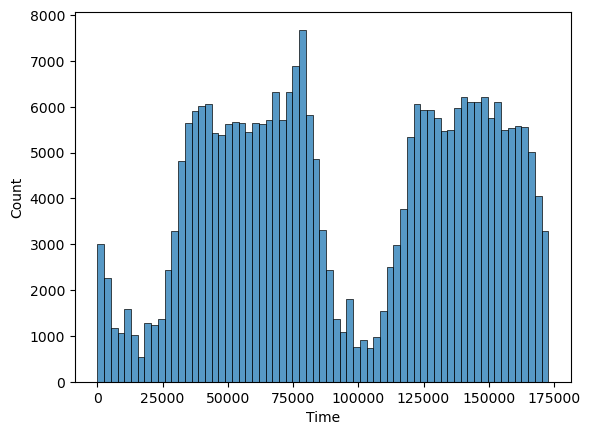

In [14]:
# Plotting thr Histogram of data on Time.
sns.histplot(x='Time',data=data)
plt.show()

In [15]:
# Five number summary in Traspose veiw
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


# 4.4 Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.


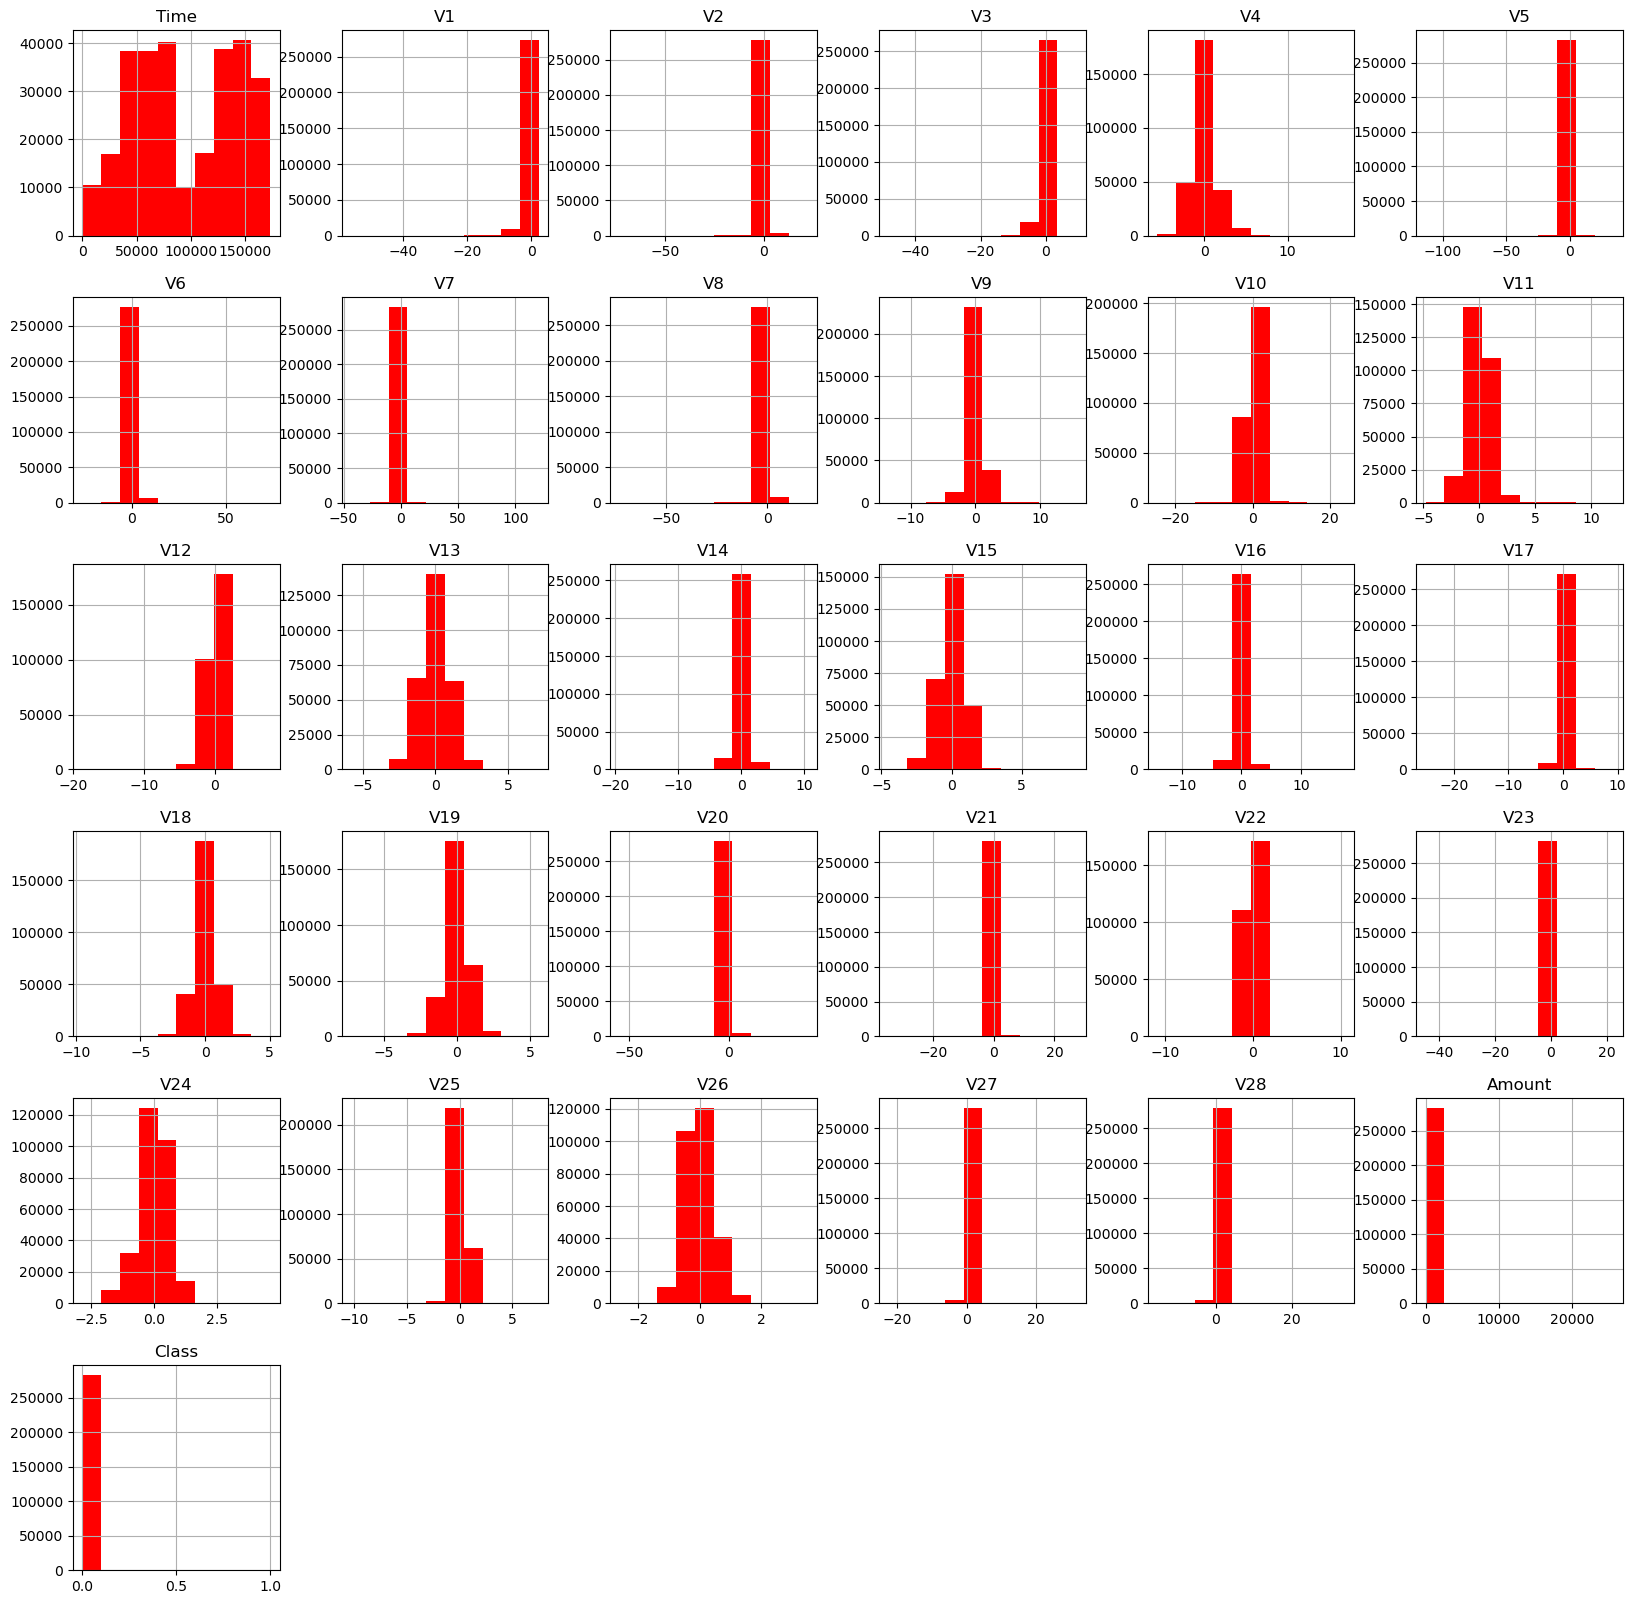

In [16]:
# Distpot of Data
data.hist(figsize=(20,20),color='red')
plt.show()

In [17]:
genuine_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Time vs Amount of Fraud Transactions')

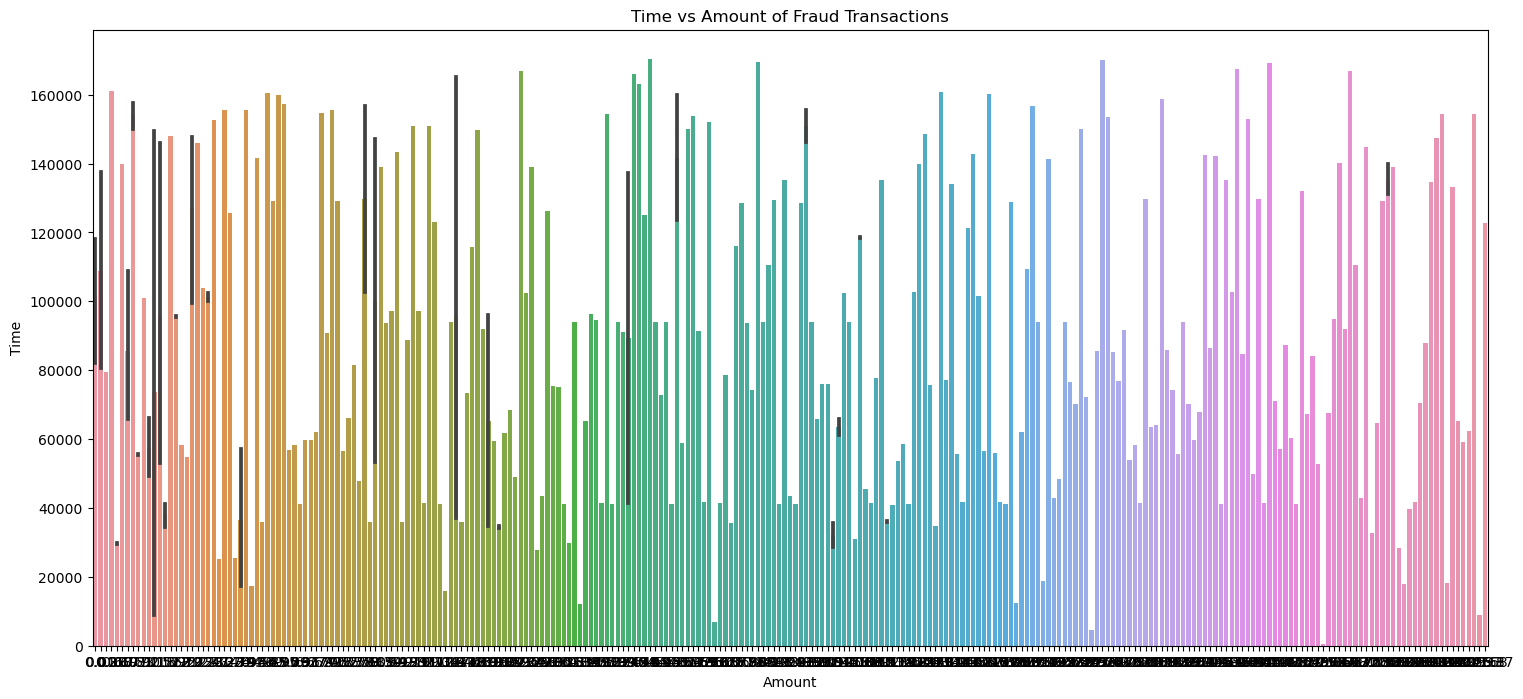

In [18]:
# Plotting the BarPlot of Fraud Trasnactions
plt.figure(figsize=(18,8))
sns.barplot(y="Time",x="Amount",data=fraud_data)
plt.title("Time vs Amount of Fraud Transactions")


Text(0.5, 1.0, 'Time of Genuine Transactions')

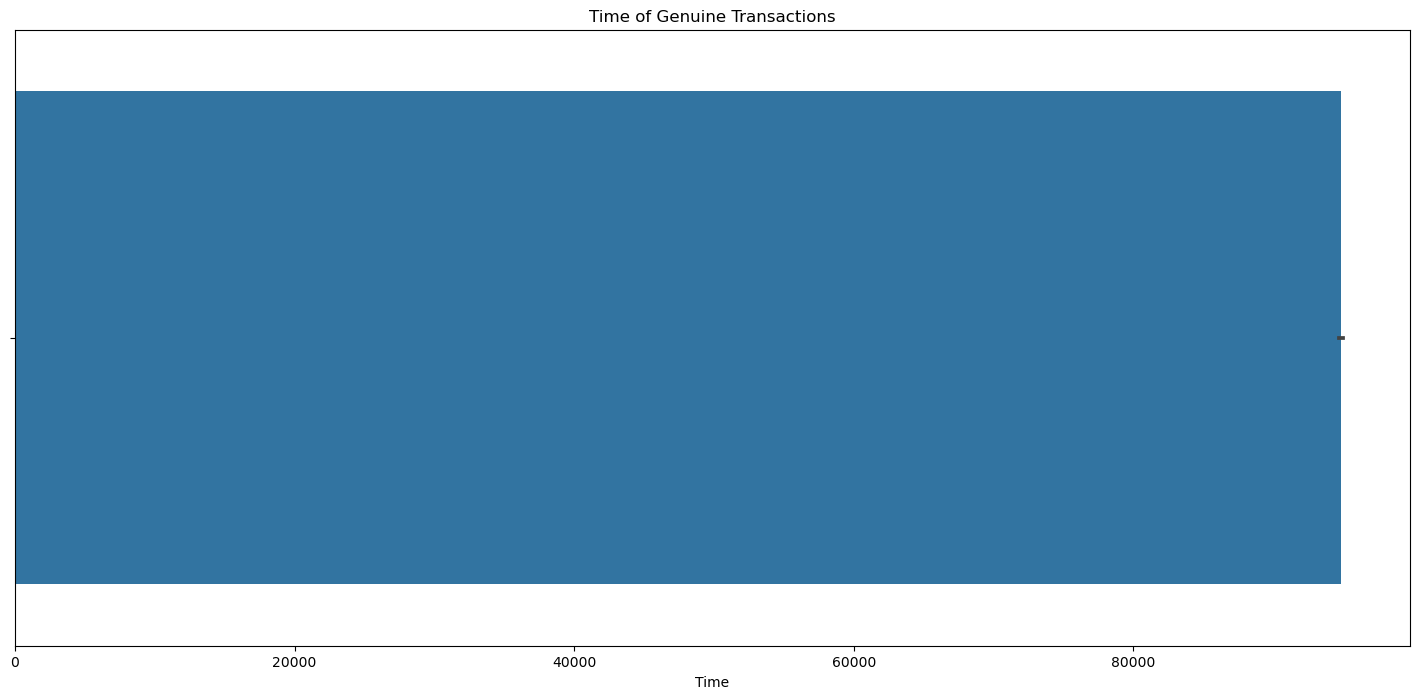

In [19]:
# Plotting the BarPlot of Genuine Trasnactions
plt.figure(figsize=(18,8))
sns.barplot(x="Time",data=genuine_data)
plt.title("Time of Genuine Transactions")

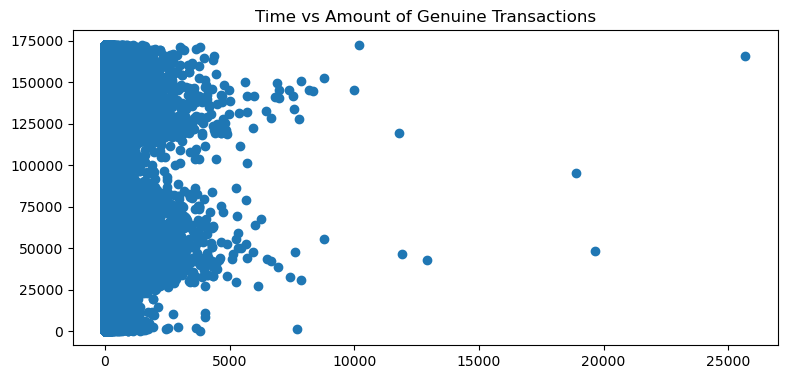

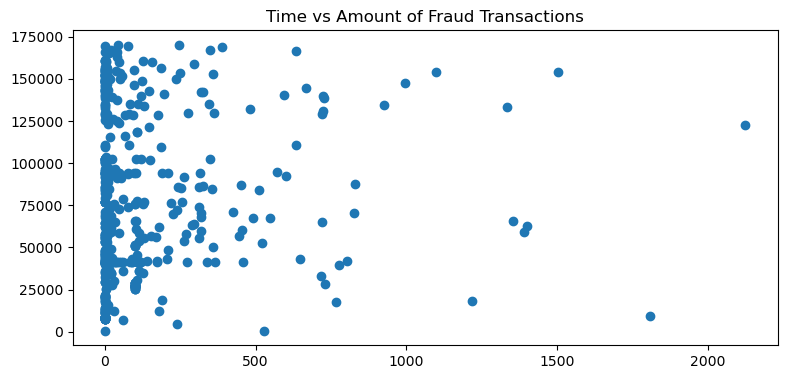

In [20]:
# Plotting Scatter Plot for Genuine & Fraud Trasnsactions
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
plt.scatter(y="Time",x="Amount",data=genuine_data)
plt.title("Time vs Amount of Genuine Transactions")
plt.show()

plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
plt.scatter(y="Time",x="Amount",data=fraud_data)
plt.title("Time vs Amount of Fraud Transactions")
plt.show()

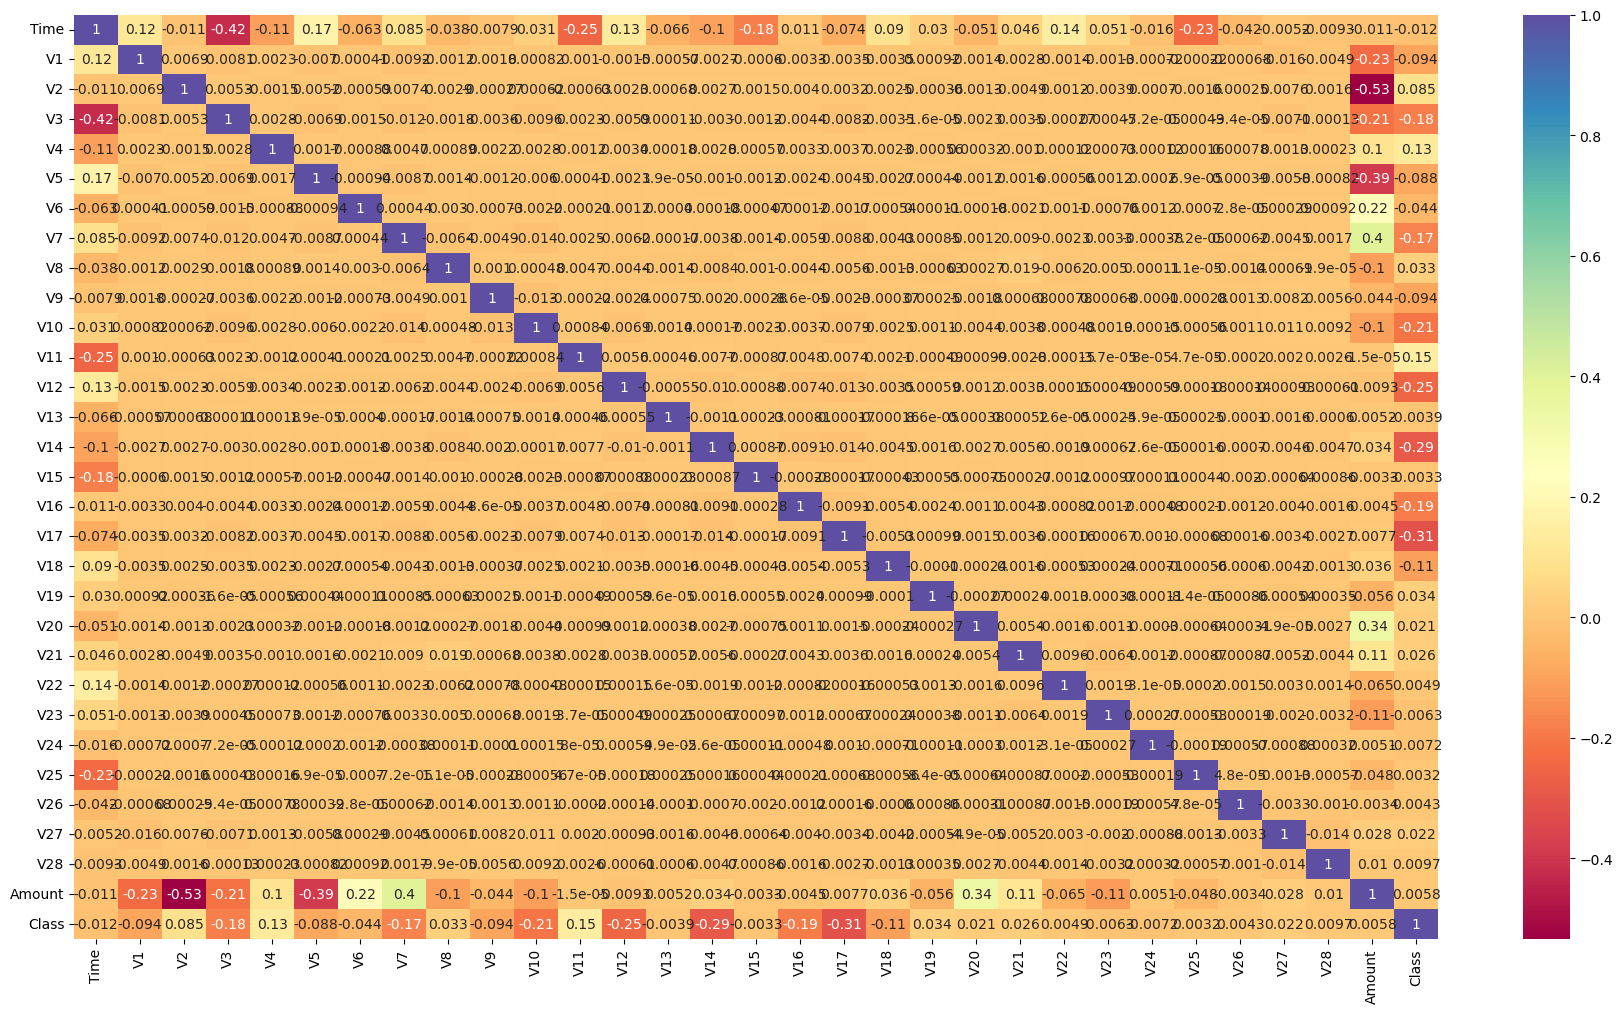

In [21]:
# Heatmap Ploting of Correlation.
plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True,cmap='Spectral')
plt.show()

Highest -ve correlation is with Amount and V3 of -0.53 and Highest +ve correleation with Amount and V20 of +0.34

# 4.5 Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column

# 4.6 Split the dataset in train and test set and have a 70:30 split ratio for the model.


In [22]:
# Data Split of Independent & Dependent Variables of our data for Modeling.
x=data.iloc[:,:-1]  #Independent Variables
y=data.iloc[::,-1]  #Dependenent Variables

In [23]:
# Trian & Test Split and Standarized out data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(198608, 30)
(85118, 30)
(198608,)
(85118,)


# 4.7 Now use a decision tree and random forest model for training on top of the train set.

# 4.10 Check the performance matrix of both models and compare which model is having the highest performanc.

# Decision Tree Model:

In [24]:
dt=DecisionTreeClassifier()  # call the Decision Tree for modeling
dt.fit(x_train,y_train)  # Fit our Training Data for model
dt_pred=dt.predict(x_test) # Prdicting the model on Test data
dt_pred # Showing the predicted values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# Classification Report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.70      0.67      0.69       125

    accuracy                           1.00     85118
   macro avg       0.85      0.84      0.84     85118
weighted avg       1.00      1.00      1.00     85118



In [26]:
confusion_matrix(y_test,dt_pred)

array([[84957,    36],
       [   41,    84]], dtype=int64)

Text(0.5, 1.0, ' Decision Tree Confusion Matrics')

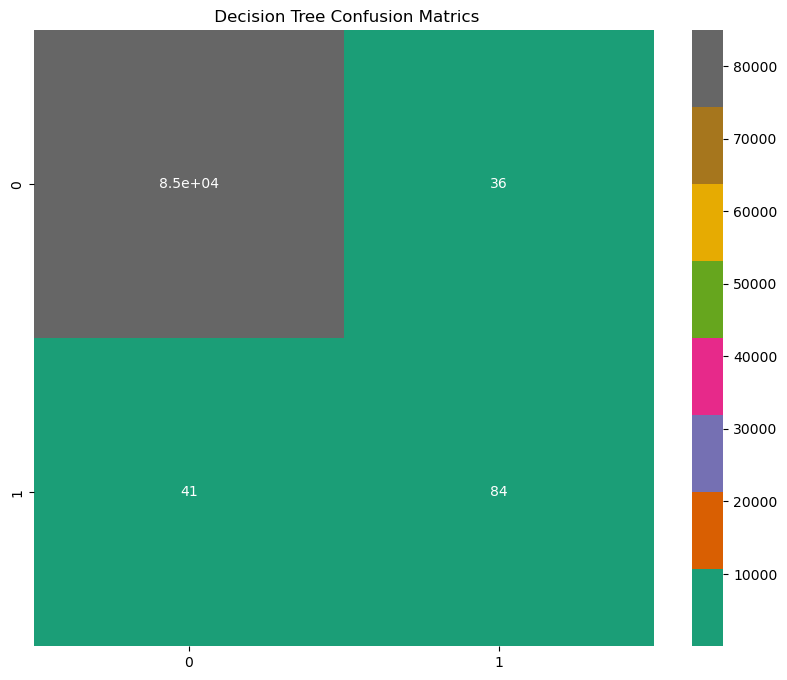

In [27]:
# Confusion Matrics
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True, cmap='Dark2')
plt.title(" Decision Tree Confusion Matrics")

# Random Forest Model:

In [28]:
rf=RandomForestClassifier()  # call the Decision Tree for modeling
rf.fit(x_train,y_train)  # Fit our Training Data for model
rf_pred=rf.predict(x_test) # Prdicting the model on Test data
rf_pred # Showing the predicted values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.95      0.72      0.82       125

    accuracy                           1.00     85118
   macro avg       0.97      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



Text(0.5, 1.0, ' Random Forest Confusion Matrics')

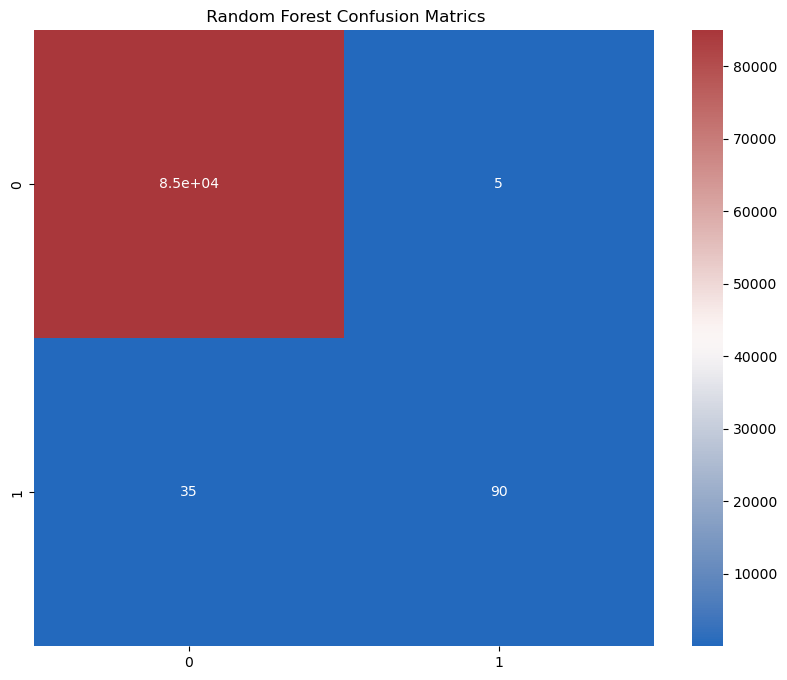

In [30]:
# Confusion Matrics
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True, cmap='vlag')
plt.title(" Random Forest Confusion Matrics")

# 4.9 Compare the accuracy of both models using score(

In [31]:
print("Rf Accuracy: ",accuracy_score(y_test,rf_pred))
print("Dt Accuracy: ",accuracy_score(y_test,dt_pred))

Rf Accuracy:  0.999530064146244
Dt Accuracy:  0.9990953734815198


# 5 Conclussion

Both model give very high accuracy with data split ration 70:30.